# IBM Data Science Capstone Project

**The project focuses on the neighbourhoods and boroughs in New York City and aims to solve the problem of selecting an appropriate neighbourhood for opening a Chinese restaurant.**

I've utilized word clouds on the cuisine data of NYC obtained from wikipedia to understand the spread of cuisines. I utilized the results of the word cloud to select a location in NYC and implemented K-means clustering in that region.  

In [14]:
#Importing the required libraries

import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
from PIL import Image # converting images into arrays

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes 
#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Libraries imported.
Matplotlib version:  3.0.2


In [15]:
#Importing the word cloud library

from wordcloud import WordCloud, STOPWORDS

## Exploring the cuisine dataset

In [16]:
cuisine=pd.read_csv('C:\\Users\\simaa\\Desktop\\Projects\\IBM_Coursera_Data_Science_Capstone\\data\\Restaurant_Grades.csv')

In [17]:
cuisine.head()

,DBA,BORO,BUILDING,STREET,ZIPCODE,CUISINE DESCRIPTION,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE
0,MORRIS PARK BAKE SHOP,Bronx,1007,MORRIS PARK AVE,10462.0,Bakery,Pesticide use not in accordance with label or ...,N,6,A,06/11/2019,08/13/2019
1,MORRIS PARK BAKE SHOP,Bronx,1007,MORRIS PARK AVE,10462.0,Bakery,Plumbing not properly installed or maintained;...,N,6,A,06/11/2019,08/13/2019
2,MORRIS PARK BAKE SHOP,Bronx,1007,MORRIS PARK AVE,10462.0,Bakery,Non-food contact surface improperly constructe...,N,6,A,06/11/2019,08/13/2019
3,MORRIS PARK BAKE SHOP,Bronx,1007,MORRIS PARK AVE,10462.0,Bakery,Pesticide use not in accordance with label or ...,N,5,A,05/11/2018,08/13/2019
4,MORRIS PARK BAKE SHOP,Bronx,1007,MORRIS PARK AVE,10462.0,Bakery,Non-food contact surface improperly constructe...,N,5,A,05/11/2018,08/13/2019


In [18]:
bor_cuisine=cuisine[['BORO', 'CUISINE DESCRIPTION']]

In [19]:
type(bor_cuisine)

pandas.core.frame.DataFrame

In [20]:
bor_cuisine.head()

,BORO,CUISINE DESCRIPTION
0,Bronx,Bakery
1,Bronx,Bakery
2,Bronx,Bakery
3,Bronx,Bakery
4,Bronx,Bakery


In [21]:
bor_cuisine['BORO'].value_counts()

Manhattan        76389
Brooklyn         48689
Queens           44702
Bronx            18154
Staten Island     6675
0                   54
Name: BORO, dtype: int64

In [22]:
bor_cuisine['CUISINE DESCRIPTION'].value_counts()

American                                                            43124
Chinese                                                             19892
Café/Coffee/Tea                                                     10510
Pizza                                                                8712
Italian                                                              7787
Latin (Cuban, Dominican, Puerto Rican, South & Central American)     7687
Mexican                                                              7540
Japanese                                                             6637
Bakery                                                               6199
Caribbean                                                            6180
Spanish                                                              5493
Pizza/Italian                                                        4081
Chicken                                                              3704
Donuts                                

#### Exploring cuisines in Manhattan

In [23]:
Man_cuisine=bor_cuisine[bor_cuisine['BORO'] == 'Manhattan']
Cuisine_M=Man_cuisine[['CUISINE DESCRIPTION']]
Cuisine_M.head()

,CUISINE DESCRIPTION
21,Irish
22,Irish
23,Irish
24,Irish
25,Irish


In [ ]:
Cuisine_M.to_csv('CUISINE_Manhattan.txt', sep=',', index=False)

In [25]:
Cuisine_M1 = open('C:\\Users\\simaa\\Desktop\\Projects\\IBM_Coursera_Data_Science_Capstone\\results\\CUISINE_Manhattan.txt', 'r').read()

In [26]:
stopwords = set(STOPWORDS)

In [28]:
NYC_CUISINE_Man = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
NYC_CUISINE_Man.generate(Cuisine_M1)

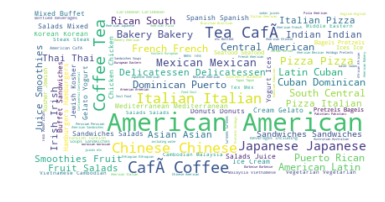

<Figure size 3240x3960 with 0 Axes>

In [29]:
plt.imshow(NYC_CUISINE_Man, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(45)
fig.set_figheight(55)

plt.show()

#### Exploring cuisines in Brooklyn 

In [30]:
Brook_cuisine=bor_cuisine[bor_cuisine['BORO'] == 'Brooklyn']
Cuisine_B=Brook_cuisine[['CUISINE DESCRIPTION']]
Cuisine_B.head()

,CUISINE DESCRIPTION
7,Hamburgers
8,Hamburgers
9,Hamburgers
10,Hamburgers
11,Hamburgers


In [ ]:
Cuisine_B.to_csv('CUISINE_Brooklyn.txt', sep=',', index=False)

In [31]:
Cuisine_B1 = open('C:\\Users\\simaa\\Desktop\\Projects\\IBM_Coursera_Data_Science_Capstone\\results\\CUISINE_Brooklyn.txt', 'r').read()

In [32]:
NYC_CUISINE_B = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
NYC_CUISINE_B.generate(Cuisine_B1)

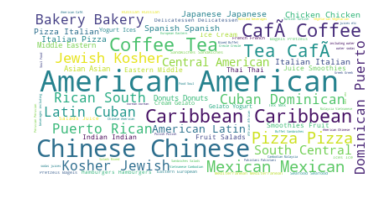

<Figure size 3240x3960 with 0 Axes>

In [33]:
plt.imshow(NYC_CUISINE_B, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(45)
fig.set_figheight(55)

plt.show()

#### Exploring cuisines in Bronx

In [34]:
Bronx_cuisine=bor_cuisine[bor_cuisine['BORO'] == 'Bronx']
Cuisine_Br=Bronx_cuisine[['CUISINE DESCRIPTION']]
Cuisine_Br.head()

,CUISINE DESCRIPTION
0,Bakery
1,Bakery
2,Bakery
3,Bakery
4,Bakery


In [ ]:
Cuisine_Br.to_csv('CUISINE_Bronx.txt', sep=',', index=False)

In [35]:
Cuisine_Br1 = open('C:\\Users\\simaa\\Desktop\\Projects\\IBM_Coursera_Data_Science_Capstone\\results\\CUISINE_Bronx.txt', 'r').read()

NYC_CUISINE_Br = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
NYC_CUISINE_Br.generate(Cuisine_Br1)

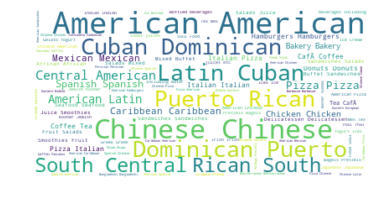

<Figure size 3240x3960 with 0 Axes>

In [36]:
plt.imshow(NYC_CUISINE_Br, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(45)
fig.set_figheight(55)

plt.show()

#### Exploring cuisines on Staten Island

In [37]:
staten_island_cuisine=bor_cuisine[bor_cuisine['BORO'] == 'Staten Island']
Cuisine_stat=staten_island_cuisine[['CUISINE DESCRIPTION']]
Cuisine_stat.head()

,CUISINE DESCRIPTION
201,Delicatessen
202,Delicatessen
203,Delicatessen
204,Delicatessen
205,Delicatessen


In [ ]:
Cuisine_stat.to_csv('CUISINE_StatenIsland.txt', sep=',', index=False)

In [38]:
Cuisine_stat1 = open('C:\\Users\\simaa\\Desktop\\Projects\\IBM_Coursera_Data_Science_Capstone\\results\\CUISINE_StatenIsland.txt', 'r').read()

NYC_CUISINE_stat = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
NYC_CUISINE_stat.generate(Cuisine_stat1)

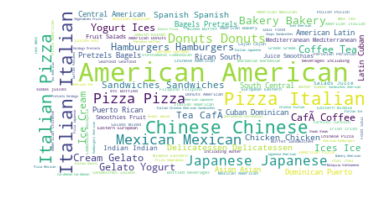

<Figure size 3240x3960 with 0 Axes>

In [39]:
plt.imshow(NYC_CUISINE_stat, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(45)
fig.set_figheight(55)

plt.show()

**The above word clouds show that the most popular cuisine in New York in American. In case of Chinese cuisine, Bronx has more chinese restaurants than any other city in the NYC region. Thus, exploring Bronx makes sense.**


In [41]:
with open('C:\\Users\\simaa\\Desktop\\Projects\\IBM_Coursera_Data_Science_Capstone\\data\\newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [42]:
newyork_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

In [43]:
neighborhoods_data = newyork_data['features']

In [44]:
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

In [45]:
#Creating an empty dataframe for NYC
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiating the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [46]:
neighborhoods

,Borough,Neighborhood,Latitude,Longitude


In [47]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [48]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [49]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


In [50]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [51]:
# creating map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# adding markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

In [52]:
CLIENT_ID = 'JIA5BTQ3NTZCVG2L30RUSA4PIZ1GN5YAVWA2ZJF352ZEOKWL' # your Foursquare ID
CLIENT_SECRET = 'GROWMUMSLS4WSUPAQX1SAMFZFUQPL3YHGG0UYX4IB1Z13SLA' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: JIA5BTQ3NTZCVG2L30RUSA4PIZ1GN5YAVWA2ZJF352ZEOKWL
CLIENT_SECRET:GROWMUMSLS4WSUPAQX1SAMFZFUQPL3YHGG0UYX4IB1Z13SLA


### Exploring Bronx borough for clustering 

In [53]:
bronx_data = neighborhoods[neighborhoods['Borough'] == 'Bronx'].reset_index(drop=True)
bronx_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [54]:
dress = 'Bronx, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Bronx are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Bronx are 40.7127281, -74.0060152.


In [55]:
# creating map of Bronx using latitude and longitude values
map_bronx = folium.Map(location=[latitude, longitude], zoom_start=11)

# adding markers to map
for lat, lng, label in zip(bronx_data['Latitude'], bronx_data['Longitude'], bronx_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_bronx)  
    
map_bronx

In [56]:
bronx_data.loc[0, 'Neighborhood']

'Wakefield'

In [57]:
neighborhood_latitude = bronx_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = bronx_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = bronx_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Wakefield are 40.89470517661, -73.84720052054902.


In [58]:
LIMIT=100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL


'https://api.foursquare.com/v2/venues/explore?&client_id=JIA5BTQ3NTZCVG2L30RUSA4PIZ1GN5YAVWA2ZJF352ZEOKWL&client_secret=GROWMUMSLS4WSUPAQX1SAMFZFUQPL3YHGG0UYX4IB1Z13SLA&v=20180605&ll=40.89470517661,-73.84720052054902&radius=500&limit=100'

In [59]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5eb0efa51a4b0a002857b397'},
 'response': {'headerLocation': 'Wakefield',
  'headerFullLocation': 'Wakefield, Bronx',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 9,
  'suggestedBounds': {'ne': {'lat': 40.899205181110005,
    'lng': -73.84125857127495},
   'sw': {'lat': 40.89020517211, 'lng': -73.8531424698231}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4c537892fd2ea593cb077a28',
       'name': 'Lollipops Gelato',
       'location': {'address': '4120 Baychester Ave',
        'crossStreet': 'Edenwald & Bussing Ave',
        'lat': 40.894123150205274,
        'lng': -73.84589162362325,
        'labeledLatLngs': [{'label': 'display',
          'lat': 40.894123150205274,
          'lng': -73.84589162362325},
    

In [60]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [61]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filtering columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filtering the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# cleaning columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Lollipops Gelato,Dessert Shop,40.894123,-73.845892
1,Carvel Ice Cream,Ice Cream Shop,40.890487,-73.848568
2,Walgreens,Pharmacy,40.896528,-73.844700
3,Rite Aid,Pharmacy,40.896649,-73.844846
4,Dunkin',Donut Shop,40.890459,-73.849089


In [62]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

9 venues were returned by Foursquare.


In [63]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # creating the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # making the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # returning only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [64]:
bronx_venues=getNearbyVenues(names=bronx_data['Neighborhood'],
                                    latitudes=bronx_data['Latitude'],
                                    longitudes=bronx_data['Longitude']
                                  )

Wakefield
Co-op City
Eastchester
Fieldston
Riverdale
Kingsbridge
Woodlawn
Norwood
Williamsbridge
Baychester
Pelham Parkway
City Island
Bedford Park
University Heights
Morris Heights
Fordham
East Tremont
West Farms
High  Bridge
Melrose
Mott Haven
Port Morris
Longwood
Hunts Point
Morrisania
Soundview
Clason Point
Throgs Neck
Country Club
Parkchester
Westchester Square
Van Nest
Morris Park
Belmont
Spuyten Duyvil
North Riverdale
Pelham Bay
Schuylerville
Edgewater Park
Castle Hill
Olinville
Pelham Gardens
Concourse
Unionport
Edenwald
Claremont Village
Concourse Village
Mount Eden
Mount Hope
Bronxdale
Allerton
Kingsbridge Heights


In [65]:
print(bronx_venues.shape)
bronx_venues.head()

(1216, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Wakefield,40.894705,-73.847201,Lollipops Gelato,40.894123,-73.845892,Dessert Shop
1,Wakefield,40.894705,-73.847201,Carvel Ice Cream,40.890487,-73.848568,Ice Cream Shop
2,Wakefield,40.894705,-73.847201,Walgreens,40.896528,-73.844700,Pharmacy
3,Wakefield,40.894705,-73.847201,Rite Aid,40.896649,-73.844846,Pharmacy
4,Wakefield,40.894705,-73.847201,Dunkin',40.890459,-73.849089,Donut Shop


In [66]:
bronx_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Allerton,32,32,32,32,32,32
Baychester,19,19,19,19,19,19
Bedford Park,37,37,37,37,37,37
Belmont,100,100,100,100,100,100
Bronxdale,13,13,13,13,13,13
Castle Hill,8,8,8,8,8,8
City Island,27,27,27,27,27,27
Claremont Village,19,19,19,19,19,19
Clason Point,10,10,10,10,10,10


In [67]:
print('There are {} uniques categories.'.format(len(bronx_venues['Venue Category'].unique())))

There are 168 uniques categories.


In [68]:
# one hot encoding
bronx_onehot = pd.get_dummies(bronx_venues[['Venue Category']], prefix="", prefix_sep="")

# adding neighborhood column back to dataframe
bronx_onehot['Neighborhood'] = bronx_venues['Neighborhood'] 

# moving neighborhood column to the first column
fixed_columns = [bronx_onehot.columns[-1]] + list(bronx_onehot.columns[:-1])
bronx_onehot = bronx_onehot[fixed_columns]

bronx_onehot.head()

,Neighborhood,Accessories Store,African Restaurant,American Restaurant,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beer Bar,Boat or Ferry,Bookstore,Bowling Alley,Breakfast Spot,Brewery,Buffet,Building,Burger Joint,Bus Line,Bus Station,Bus Stop,Café,Candy Store,Caribbean Restaurant,Check Cashing Service,Cheese Shop,Chinese Restaurant,Clothing Store,Coffee Shop,Comfort Food Restaurant,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distillery,Dive Bar,Donut Shop,Eastern European Restaurant,Electronics Store,Event Space,Eye Doctor,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Food,Food & Drink Shop,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gas Station,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hotel,Ice Cream Shop,Indian Restaurant,Indie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Juice Bar,Kids Store,Lake,Latin American Restaurant,Laundromat,Lawyer,Liquor Store,Lounge,Market,Martial Arts Dojo,Mattress Store,Medical Supply Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Music Store,Music Venue,Nightclub,Outdoor Sculpture,Outlet Store,Paella Restaurant,Paper / Office Supplies Store,Park,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Piano Bar,Pizza Place,Platform,Playground,Plaza,Pool,Pub,Recreation Center,Rental Car Location,Restaurant,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Smoke Shop,Snack Place,Social Club,Soup Place,South American Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,Storage Facility,Supermarket,Supplement Shop,Sushi Restaurant,Tattoo Parlor,Tennis Court,Tennis Stadium,Thai Restaurant,Thrift / Vintage Store,Track,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Waste Facility,Wine Shop,Wings Joint,Women's Store
0,Wakefield,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Wakefield,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Wakefield,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Wakefield,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Wakefield,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [69]:
bronx_onehot.shape

(1216, 169)

In [70]:
bronx_grouped = bronx_onehot.groupby('Neighborhood').mean().reset_index()
bronx_grouped

,Neighborhood,Accessories Store,African Restaurant,American Restaurant,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beer Bar,Boat or Ferry,Bookstore,Bowling Alley,Breakfast Spot,Brewery,Buffet,Building,Burger Joint,Bus Line,Bus Station,Bus Stop,Café,Candy Store,Caribbean Restaurant,Check Cashing Service,Cheese Shop,Chinese Restaurant,Clothing Store,Coffee Shop,Comfort Food Restaurant,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distillery,Dive Bar,Donut Shop,Eastern European Restaurant,Electronics Store,Event Space,Eye Doctor,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Food,Food & Drink Shop,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gas Station,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hotel,Ice Cream Shop,Indian Restaurant,Indie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Juice Bar,Kids Store,Lake,Latin American Restaurant,Laundromat,Lawyer,Liquor Store,Lounge,Market,Martial Arts Dojo,Mattress Store,Medical Supply Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Music Store,Music Venue,Nightclub,Outdoor Sculpture,Outlet Store,Paella Restaurant,Paper / Office Supplies Store,Park,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Piano Bar,Pizza Place,Platform,Playground,Plaza,Pool,Pub,Recreation Center,Rental Car Location,Restaurant,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Smoke Shop,Snack Place,Social Club,Soup Place,South American Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,Storage Facility,Supermarket,Supplement Shop,Sushi Restaurant,Tattoo Parlor,Tennis Court,Tennis Stadium,Thai Restaurant,Thrift / Vintage Store,Track,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Waste Facility,Wine Shop,Wings Joint,Women's Store
0,Allerton,0.000000,0.000000,0.031250,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.031250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031250,0.00,0.062500,0.000000,0.000000,0.000000,0.03125,0.000000,0.000000,0.000000,0.000000,0.062500,0.062500,0.031250,0.000000,0.031250,0.000000,0.000,0.031250,0.000000,0.031250,0.000000,0.000000,0.000000,0.031250,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.031250,0.000000,0.000000,0.031250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.031250,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.031250,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031250,0.00,0.156250,0.00,0.031250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.0,0.000000,0.000000,0.031250,0.031250,0.000000,0.000000,0.000000,0.000000,0.062500,0.000000,0.000000,0.00,0.0,0.0,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000
1,Baychester,0.000000,0.000000,0.000000,0.052632,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.052632,0.

In [71]:
bronx_grouped.shape

(52, 169)

In [72]:
num_top_venues = 5

for hood in bronx_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = bronx_grouped[bronx_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Allerton----
                venue  freq
0         Pizza Place  0.16
1  Chinese Restaurant  0.06
2         Supermarket  0.06
3              Bakery  0.06
4    Department Store  0.06


----Baychester----
                  venue  freq
0            Donut Shop  0.11
1  Fast Food Restaurant  0.05
2   Fried Chicken Joint  0.05
3           Supermarket  0.05
4             Pet Store  0.05


----Bedford Park----
                venue  freq
0               Diner  0.11
1         Pizza Place  0.11
2  Chinese Restaurant  0.11
3       Deli / Bodega  0.08
4  Mexican Restaurant  0.08


----Belmont----
                venue  freq
0  Italian Restaurant  0.19
1         Pizza Place  0.09
2       Deli / Bodega  0.08
3              Bakery  0.05
4          Donut Shop  0.03


----Bronxdale----
                         venue  freq
0           Spanish Restaurant  0.08
1                         Park  0.08
2           Italian Restaurant  0.08
3  Eastern European Restaurant  0.08
4                  Supermarket  

           venue  freq
0  Deli / Bodega  0.15
1    Coffee Shop  0.15
2      Juice Bar  0.08
3            Bar  0.08
4    Pizza Place  0.08


----Unionport----
                       venue  freq
0  Latin American Restaurant  0.09
1             Ice Cream Shop  0.09
2                 Donut Shop  0.09
3          Electronics Store  0.04
4         Chinese Restaurant  0.04


----University Heights----
                 venue  freq
0          Pizza Place  0.12
1   Chinese Restaurant  0.12
2  Fried Chicken Joint  0.08
3       Sandwich Place  0.04
4       History Museum  0.04


----Van Nest----
           venue  freq
0    Pizza Place  0.21
1         Bakery  0.11
2  Deli / Bodega  0.11
3     Donut Shop  0.05
4            Spa  0.05


----Wakefield----
            venue  freq
0        Pharmacy  0.22
1    Dessert Shop  0.11
2     Gas Station  0.11
3  Sandwich Place  0.11
4  Ice Cream Shop  0.11


----West Farms----
              venue  freq
0       Bus Station  0.23
1              Park  0.09
2        

In [73]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [74]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# creating columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# creating a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = bronx_grouped['Neighborhood']

for ind in np.arange(bronx_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(bronx_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allerton,Pizza Place,Bakery,Department Store,Deli / Bodega,Supermarket,Chinese Restaurant,Spa,Fried Chicken Joint,Breakfast Spot,Spanish Restaurant
1,Baychester,Donut Shop,Spanish Restaurant,Bus Station,Men's Store,Pizza Place,Fast Food Restaurant,Mattress Store,Supermarket,Fried Chicken Joint,Electronics Store
2,Bedford Park,Pizza Place,Diner,Chinese Restaurant,Deli / Bodega,Mexican Restaurant,Sandwich Place,Donut Shop,Smoke Shop,Burger Joint,Spanish Restaurant
3,Belmont,Italian Restaurant,Pizza Place,Deli / Bodega,Bakery,Café,Dessert Shop,Grocery Store,Donut Shop,Mexican Restaurant,Bank
4,Bronxdale,Pizza Place,Gym,Spanish Restaurant,Breakfast Spot,Supermarket,Eastern European Restaurant,Chinese Restaurant,Paper / Office Supplies Store,Bank,Park


In [75]:
# setting number of clusters
kclusters = 5

bronx_grouped_clustering = bronx_grouped.drop('Neighborhood', 1)

# running k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(bronx_grouped_clustering)

# checking cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 3, 3, 3, 3, 3, 3, 0, 0, 0])

In [76]:
# adding clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

bronx_merged = bronx_data

# merging toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
bronx_merged = bronx_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

bronx_merged.head() # checking the last columns!

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bronx,Wakefield,40.894705,-73.847201,0,Pharmacy,Ice Cream Shop,Dessert Shop,Pizza Place,Sandwich Place,Laundromat,Donut Shop,Gas Station,Event Space,Fish Market
1,Bronx,Co-op City,40.874294,-73.829939,0,Bus Station,Baseball Field,Ice Cream Shop,Park,Fast Food Restaurant,Mattress Store,Chinese Restaurant,Bagel Shop,Grocery Store,Restaurant
2,Bronx,Eastchester,40.887556,-73.827806,1,Caribbean Restaurant,Diner,Deli / Bodega,Platform,Bakery,Pizza Place,Metro Station,Bowling Alley,Fast Food Restaurant,Chinese Restaurant
3,Bronx,Fieldston,40.895437,-73.905643,2,Plaza,Bus Station,Women's Store,Event Space,Food,Flea Market,Fish Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market
4,Bronx,Riverdale,40.890834,-73.912585,3,Park,Bus Station,Gym,Food Truck,Medical Supply Store,Baseball Field,Bank,Plaza,Home Service,Donut Shop


In [88]:
# creating map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# setting color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# adding markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(bronx_merged['Latitude'], bronx_merged['Longitude'], bronx_merged['Neighborhood'], bronx_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [78]:
bronx_merged.loc[bronx_merged['Cluster Labels'] == 0, bronx_merged.columns[[1] + list(range(5, bronx_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Wakefield,Pharmacy,Ice Cream Shop,Dessert Shop,Pizza Place,Sandwich Place,Laundromat,Donut Shop,Gas Station,Event Space,Fish Market
1,Co-op City,Bus Station,Baseball Field,Ice Cream Shop,Park,Fast Food Restaurant,Mattress Store,Chinese Restaurant,Bagel Shop,Grocery Store,Restaurant
13,University Heights,Pizza Place,Chinese Restaurant,Fried Chicken Joint,Cosmetics Shop,Bakery,Burger Joint,Shoe Store,Supermarket,Sandwich Place,Donut Shop
14,Morris Heights,Chinese Restaurant,Pizza Place,Recreation Center,Pharmacy,Park,Latin American Restaurant,Grocery Store,Spanish Restaurant,Bank,Electronics Store
19,Melrose,Pizza Place,Pharmacy,Discount Store,Grocery Store,Sandwich Place,Intersection,Clothing Store,Mexican Restaurant,Department Store,Martial Arts Dojo
20,Mott Haven,Spanish Restaurant,Pizza Place,Gym,Donut Shop,Department Store,Bakery,Burger Joint,Mobile Phone Shop,Storage Facility,Bookstore
22,Longwood,Deli / Bodega,Sandwich Place,Fast Food Restaurant,Grocery Store,Latin American Restaurant,Donut Shop,Diner,Wine Shop,Event Space,Flea Market
24,Morrisania,Discount Store,Metro Station,Fast Food Restaurant,Liquor Store,Donut Shop,Bus Station,Pizza Place,Pharmacy,Mexican Restaurant,Fish Market
25,Soundview,Chinese Restaurant,Grocery Store,Liquor Store,Discount Store,Bus Station,Pharmacy,Bus Stop,Video Store,Breakfast Spot,Fried Chicken Joint
26,Clason Point,Park,Pool,South American Restaurant,Boat or Ferry,Bus Stop,Grocery Store,Spa,Farmers Market,Fish Market,Fish & Chips Shop


In [79]:
bronx_merged.loc[bronx_merged['Cluster Labels'] == 1, bronx_merged.columns[[1] + list(range(5, bronx_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Eastchester,Caribbean Restaurant,Diner,Deli / Bodega,Platform,Bakery,Pizza Place,Metro Station,Bowling Alley,Fast Food Restaurant,Chinese Restaurant
8,Williamsbridge,Caribbean Restaurant,Supermarket,Nightclub,Soup Place,Bar,Eye Doctor,Flea Market,Fish Market,Fish & Chips Shop,Fast Food Restaurant
40,Olinville,Supermarket,Caribbean Restaurant,Metro Station,Laundromat,Fried Chicken Joint,Furniture / Home Store,Basketball Court,Chinese Restaurant,Liquor Store,Convenience Store


In [80]:
bronx_merged.loc[bronx_merged['Cluster Labels'] == 2, bronx_merged.columns[[1] + list(range(5, bronx_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Fieldston,Plaza,Bus Station,Women's Store,Event Space,Food,Flea Market,Fish Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market


In [81]:
bronx_merged.loc[bronx_merged['Cluster Labels'] == 3, bronx_merged.columns[[1] + list(range(5, bronx_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Riverdale,Park,Bus Station,Gym,Food Truck,Medical Supply Store,Baseball Field,Bank,Plaza,Home Service,Donut Shop
5,Kingsbridge,Pizza Place,Bar,Mexican Restaurant,Latin American Restaurant,Sandwich Place,Supermarket,Pharmacy,Spanish Restaurant,Bakery,Donut Shop
6,Woodlawn,Pizza Place,Playground,Deli / Bodega,Bar,Grocery Store,Pharmacy,Pub,Convenience Store,Rental Car Location,Park
7,Norwood,Pizza Place,Park,Bus Station,Bank,Pharmacy,Deli / Bodega,Chinese Restaurant,Fast Food Restaurant,Pet Store,Spanish Restaurant
9,Baychester,Donut Shop,Spanish Restaurant,Bus Station,Men's Store,Pizza Place,Fast Food Restaurant,Mattress Store,Supermarket,Fried Chicken Joint,Electronics Store
10,Pelham Parkway,Bus Station,Pizza Place,Italian Restaurant,Chinese Restaurant,Frozen Yogurt Shop,Bank,Mexican Restaurant,Metro Station,Eye Doctor,Food
11,City Island,Harbor / Marina,Seafood Restaurant,Boat or Ferry,Thrift / Vintage Store,Baseball Field,Grocery Store,French Restaurant,Music Venue,Diner,Spanish Restaurant
12,Bedford Park,Pizza Place,Diner,Chinese Restaurant,Deli / Bodega,Mexican Restaurant,Sandwich Place,Donut Shop,Smoke Shop,Burger Joint,Spanish Restaurant
15,Fordham,Mobile Phone Shop,Pizza Place,Bank,Donut Shop,Shoe Store,Gym / Fitness Center,Spanish Restaurant,Fast Food Restaurant,Supplement Shop,Pharmacy
16,East Tremont,Pizza Place,Deli / Bodega,Shoe Store,Fish & Chips Shop,Spanish Restaurant,Breakfast Spot,Mobile Phone Shop,Bus Stop,Supermarket,Café


In [82]:
bronx_merged.loc[bronx_merged['Cluster Labels'] == 4, bronx_merged.columns[[1] + list(range(5, bronx_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
28,Country Club,Sandwich Place,Playground,Athletics & Sports,Women's Store,Event Space,Food,Flea Market,Fish Market,Fish & Chips Shop,Fast Food Restaurant


In [83]:
bronx_merged.loc[bronx_merged['Cluster Labels'] == 5, bronx_merged.columns[[1] + list(range(5, bronx_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue


In [84]:
restaurants_neighborhood=bronx_merged.loc[bronx_merged['Cluster Labels'] == 3, bronx_merged.columns[[1] + list(range(5, bronx_merged.shape[1]))]]

In [85]:
type(restaurants_neighborhood)

pandas.core.frame.DataFrame

In [86]:
df=restaurants_neighborhood[restaurants_neighborhood['1st Most Common Venue'] == 'Chinese Restaurant']

In [87]:
df

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue


**Most of the restaurants could be found in cluster 0 and cluster 3. However, in  cluster 0, there weren't any Chinese  restaurants which were the first most common venue. In cluster 3 however, in Soundview neighborhood, Chinese Restaurant is the most common venue and this tells us that Chinese food is prominent in this area. Thus, opening up a restaurant in this neighborhood would be a profitable choice** 